# BL model using XGBoost predicted returns and confidence

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from Viz.Utils import get_data_for_multiple_stocks, get_df_by_metric
from os.path import join
from pathlib import Path

## Load ETIHX stock info

In [2]:
data_path = Path(r'/Users/bryankoh/Documents/GitHub/RiskAnalytics/Midterm Report/data')
holdings = pd.read_csv(join(data_path, "ETIHX_holdings_20191127.csv"))
holdings.head()

,title,name,ticker,is_valid,market cap ($B),market cap 2020 ($B),value_usd,pct_portfolio,payoff_profile
0,EXACT SCIENCES CORP,EXACT SCIENCES CORPORATION,EXAS,yes,13.65,15.33,19881400.0,2.237275,Long
1,ARGENX SE - ADR,Argenx SE,ARGX,yes,6.88,12.74,26210800.0,2.949529,Long
2,SAREPTA THERAPEUTICS INC,Sarepta Therapeutics Inc,SRPT,yes,9.70,11.06,37584680.0,4.229444,Long
3,GALAPAGOS NV-SPON ADR,Galapagos Nv,GLPG,yes,13.51,9.30,26410180.0,2.971966,Long
4,NEUROCRINE BIOSCIENCES IN,Neurocrine Biosciences Inc,NBIX,yes,9.92,8.97,31808830.0,3.579482,Long


In [3]:
# ETIHX
import pickle
from pathlib import Path

preload = True
ETIHX_path = Path(r'/Users/bryankoh/Documents/GitHub/RiskAnalytics/Midterm Report/data/ETIHX_assets_2020.pickle')
tickers = holdings['ticker'][:31]

In [4]:
if preload:
    # load the pickle file
    with open(ETIHX_path, 'rb') as handle1:
        data_dict = pickle.load(handle1)

else:
    data_dict = get_data_for_multiple_stocks(tickers, dt.date(2020, 1, 1), dt.date(2020, 9, 30))

    data_dict.pop("KRTX")
    # else dump the pickle files
    with open(ETIHX_path, 'wb') as handle1:
        pickle.dump(data_dict, handle1)

In [5]:
# add RAFA
RAFA = get_data_for_multiple_stocks(['RAFA'], dt.date(2020, 1, 1), dt.date(2020, 9, 30))['RAFA']
data_dict["RAFA"] = RAFA
len(data_dict.keys())

0/1


28

In [9]:
# get log returns
col_wanted = 'log_return'
log_returns_df = pd.DataFrame()
for k,v in data_dict.items():
    log_returns_df[k] = v[col_wanted]
log_returns_df.dropna(inplace=True)

In [7]:
import datetime
# Collect data till end of September
end_sep = datetime.datetime(2020,9,30)


In [10]:
log_returns_df = log_returns_df[log_returns_df.index <= end_sep]
log_returns_df

,EXAS,ARGX,SRPT,GLPG,NBIX,ASND,MRTX,MYOK,MNTA,BPMC,...,QURE,MYOV,RCKT,ZGNX,COLL,CRNX,AVRO,XENE,MGTA,RAFA
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,0.032971,-0.000374,0.000387,0.025113,0.007507,0.014345,-0.103328,-0.013746,-0.020999,0.025633,...,-0.019730,-0.050209,0.023878,0.004020,0.048374,0.012280,0.023565,0.045479,-0.009278,0.109113
2020-01-03,-0.006718,-0.011786,0.005331,-0.014294,0.013573,-0.028752,-0.026243,0.000834,-0.018282,-0.017180,...,0.015815,-0.045037,-0.047440,-0.024368,-0.047888,0.005888,-0.005352,-0.034857,-0.017462,0.006719
2020-01-06,0.047817,-0.013715,0.012786,-0.013579,0.008978,-0.020928,0.009933,-0.027476,0.003158,0.005555,...,0.002519,0.022426,0.002920,0.002346,-0.013692,-0.004315,0.008742,0.017951,-0.002035,-0.113329
2020-01-07,0.006306,-0.007444,-0.009401,0.002615,-0.006430,0.003123,-0.106596,0.011223,-0.001052,-0.009648,...,0.019375,-0.029538,0.021959,0.012230,-0.018887,-0.041330,-0.026459,0.087938,0.012816,0.067659
2020-01-08,0.010225,0.007955,-0.001460,-0.000387,0.011114,0.024709,0.018988,-0.012223,0.024936,-0.001990,...,-0.006187,0.019789,0.041261,0.003659,0.104708,0.054606,0.017229,0.034037,-0.001341,-0.118952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-24,0.237804,-0.011372,-0.044023,-0.033917,-0.005146,0.021815,0.009609,0.004857,0.001911,-0.015741,...,-0.021563,-0.112413,0.003501,-0.050505,-0.006730,0.030371,-0.030818,-0.015547,0.007402,0.133531
2020-09-25,0.035314,0.022375,0.044300,0.049412,-0.011803,0.031726,0.038019,0.020553,0.000191,-0.002724,...,0.005100,0.060685,0.007833,-0.014748,0.039718,0.047976,0.036722,0.014639,0.029072,0.080043
2020-09-28,0.020264,0.026989,-0.005571,0.018650,-0.003075,-0.013662,-0.001675,0.008852,0.001144,0.009950,...,-0.025489,0.017700,-0.024573,0.028171,0.015562,-0.000679,-0.045154,0.000908,-0.026126,0.034030


In [13]:
# get adj close
col_wanted = 'Adj Close'
adj_close_df = pd.DataFrame()
for k,v in data_dict.items():
    adj_close_df[k] = v[col_wanted]


In [14]:
adj_close_df = adj_close_df[adj_close_df.index <= end_sep]
adj_close_df

,EXAS,ARGX,SRPT,GLPG,NBIX,ASND,MRTX,MYOK,MNTA,BPMC,...,QURE,MYOV,RCKT,ZGNX,COLL,CRNX,AVRO,XENE,MGTA,RAFA
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,92.480003,160.520004,129.039993,206.830002,107.489998,139.119995,128.860001,72.885002,19.730000,80.110001,...,71.660004,15.520000,22.760000,52.130001,20.580000,25.090000,20.129999,13.11,15.16,0.399
2020-01-02,95.580002,160.460007,129.089996,212.089996,108.300003,141.130005,116.209999,71.889999,19.320000,82.190002,...,70.260002,14.760000,23.309999,52.340000,21.600000,25.400000,20.610001,13.72,15.02,0.445
2020-01-03,94.940002,158.580002,129.779999,209.080002,109.779999,137.130005,113.199997,71.949997,18.969999,80.790001,...,71.379997,14.110000,22.230000,51.080002,20.590000,25.549999,20.500000,13.25,14.76,0.448
2020-01-06,99.589996,156.419998,131.449997,206.259995,110.769997,134.289993,114.330002,70.000000,19.030001,81.239998,...,71.559998,14.430000,22.295000,51.200001,20.309999,25.440001,20.680000,13.49,14.73,0.400
2020-01-07,100.220001,155.259995,130.220001,206.800003,110.059998,134.710007,102.769997,70.790001,19.010000,80.459999,...,72.959999,14.010000,22.790001,51.830002,19.930000,24.410000,20.139999,14.73,14.92,0.428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-24,94.309998,243.070007,137.759995,132.470001,98.860001,149.220001,161.029999,130.020004,52.389999,88.239998,...,37.160000,19.500000,22.889999,17.760000,17.770000,14.040000,13.100000,10.85,6.78,2.400
2020-09-25,97.699997,248.570007,144.000000,139.179993,97.699997,154.029999,167.270004,132.720001,52.400002,88.000000,...,37.349998,20.719999,23.070000,17.500000,18.490000,14.730000,13.590000,11.01,6.98,2.600
2020-09-28,99.699997,255.369995,143.199997,141.800003,97.400002,151.940002,166.990005,133.899994,52.459999,88.879997,...,36.410000,21.090000,22.510000,18.000000,18.780001,14.720000,12.990000,11.02,6.80,2.690


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
# EDA
log_returns_df.expanding(0).apply(lambda x: sum(x) * 100, raw = True).plot(figsize = (10, 5))
plt.title("Asset Returns")
plt.ylabel("Returns (%)")
plt.axhline(y=0, color='black', linestyle='--')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [16]:
log_returns_df.sum()

EXAS    0.097490
ARGX    0.491909
SRPT    0.084587
GLPG   -0.376704
NBIX   -0.111384
ASND    0.103692
MRTX    0.253562
MYOK    0.626196
MNTA    0.978292
BPMC    0.145968
BHVN    0.177442
FOLD    0.371351
GBT    -0.365756
GWPH   -0.071448
SAGE   -0.166462
XNCR    0.120397
AIMT    0.028859
VCYT    0.151589
QURE   -0.665620
MYOV   -0.099507
RCKT    0.004384
ZGNX   -1.067265
COLL    0.011594
CRNX   -0.470721
AVRO   -0.435725
XENE   -0.169137
MGTA   -0.801738
RAFA    1.919426
dtype: float64

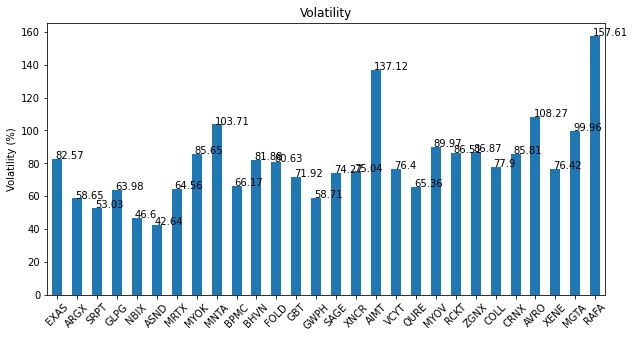

In [17]:
# vol
ax = round(log_returns_df.std() * 260 ** 0.5 * 100, 2).plot(figsize = (10, 5), kind = "bar")
plt.title("Volatility")
plt.ylabel("Volatility (%)")
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.15, p.get_height() + 0.1))

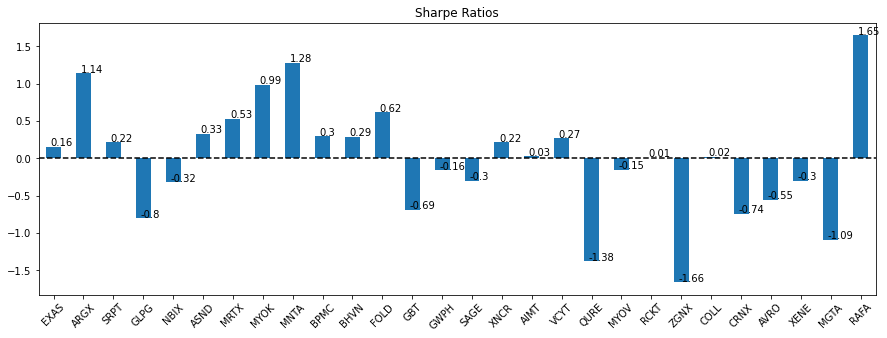

In [18]:
# sharpe ratio
ax = round(log_returns_df.mean(axis = 0) / log_returns_df.std(axis = 0) * 252 ** 0.5, 
           2).plot(kind="bar", figsize = (15, 5))

plt.title("Sharpe Ratios")
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.15, p.get_height() + 0.01))


## Prepare data for BL model -- views, priors, posteriors

In [19]:
# data prep for next step
# fund weights
fund_weights = holdings['pct_portfolio']
fund_weights.index = holdings['ticker']
fund_weights.drop(labels=[x for x in fund_weights.index if x not in log_returns_df.columns], inplace=True)
fund_weights.reindex(list(log_returns_df.columns))
fund_weights = fund_weights.divide(sum(fund_weights))  # normalize weights

# market cap 
market_cap = holdings['market cap ($B)']
market_cap.index = holdings['ticker']
market_cap.drop(labels=[x for x in market_cap.index if x not in log_returns_df.columns], inplace=True)
market_cap = market_cap.apply(lambda x: float(x))
market_cap.reindex(list(log_returns_df.columns))
market_cap_weighted = market_cap.divide(sum(market_cap))

In [20]:
from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting

rf_rate = 0.0066  # as of September 2020
market_prices = get_data_for_multiple_stocks(['^NBI'], dt.date(2020, 1, 1), dt.date(2020, 9, 30))['^NBI']['Adj Close']
delta = black_litterman.market_implied_risk_aversion(market_prices, risk_free_rate=rf_rate)
print(f'based on the risk-free rate of {rf_rate}, the market price of risk is {delta}')

0/1
based on the risk-free rate of 0.0066, the market price of risk is 1.6174112356637602


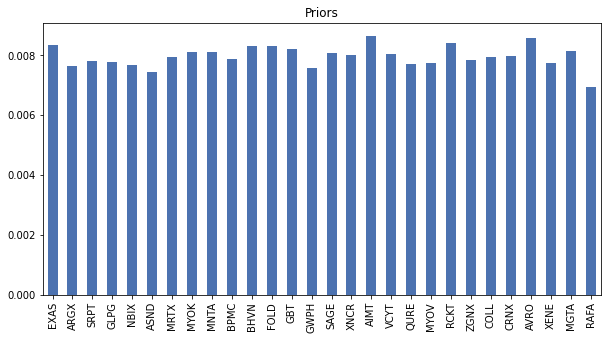

In [21]:
rets = np.exp(log_returns_df.T.to_numpy()) - 1
cov = np.cov(rets)

# pypfopt requires cov matrix to be a pandas DataFrame
cov_df = pd.DataFrame(cov, index=log_returns_df.columns, columns=log_returns_df.columns)

# prior returns based on the market returns and how much each asset contributes to it (i.e market cap weighted)
priors = black_litterman.market_implied_prior_returns(market_cap, delta, cov_df, risk_free_rate=rf_rate)
priors.plot(kind='bar', figsize=(10, 5), title='Priors')

In [22]:
#Obtain views from xgb
pred_returns = pickle.load(open('../Midterm Report/data/xgb_pred_return.pickle', 'rb'))

In [23]:
pred_returns = pred_returns.fillna(0)

In [24]:
pred_returns.sort_values(ascending=False)

BHVN    0.014799
FOLD    0.014637
GBT     0.013432
COLL    0.013277
MGTA    0.012587
VCYT    0.012456
SAGE    0.012338
AVRO    0.012051
XNCR    0.011924
EXAS    0.011844
RCKT    0.011797
MRTX    0.010990
BPMC    0.010869
MYOK    0.010218
SRPT    0.009877
CRNX    0.009520
GLPG    0.009024
ARGX    0.008960
ZGNX    0.008655
GWPH    0.008197
MYOV    0.007230
QURE    0.007199
XENE    0.007170
ASND    0.007150
NBIX    0.006546
RAFA    0.005315
MNTA    0.000000
AIMT    0.000000
dtype: float64

In [25]:
#Input confidence level from XGBoost model

confidences = pd.Series([0.6785714285714286 for p in pred_returns], index=pred_returns.index)
views = pred_returns.to_dict()

# if omega=None, view uncertainty defaulted to asset variance
bl = BlackLittermanModel(cov_df, pi=priors, absolute_views=views, risk_free_rate=rf_rate,
                         omega='idzorek', view_confidences=confidences)
                        

# posterior estimates for bl returns
post_ret = bl.bl_returns()  
post_ret.sort_values(ascending=False)

BHVN    0.012600
FOLD    0.012522
COLL    0.011945
AVRO    0.011872
GBT     0.011549
MGTA    0.011526
XNCR    0.011450
VCYT    0.011258
RCKT    0.011214
EXAS    0.011125
SAGE    0.011090
MRTX    0.010395
BPMC    0.010393
CRNX    0.010158
MYOK    0.010063
SRPT    0.009806
GLPG    0.009718
ARGX    0.009297
ZGNX    0.009038
GWPH    0.008815
QURE    0.008594
MYOV    0.008314
NBIX    0.008190
XENE    0.007843
ASND    0.007626
RAFA    0.006385
MNTA    0.005208
AIMT    0.003526
dtype: float64

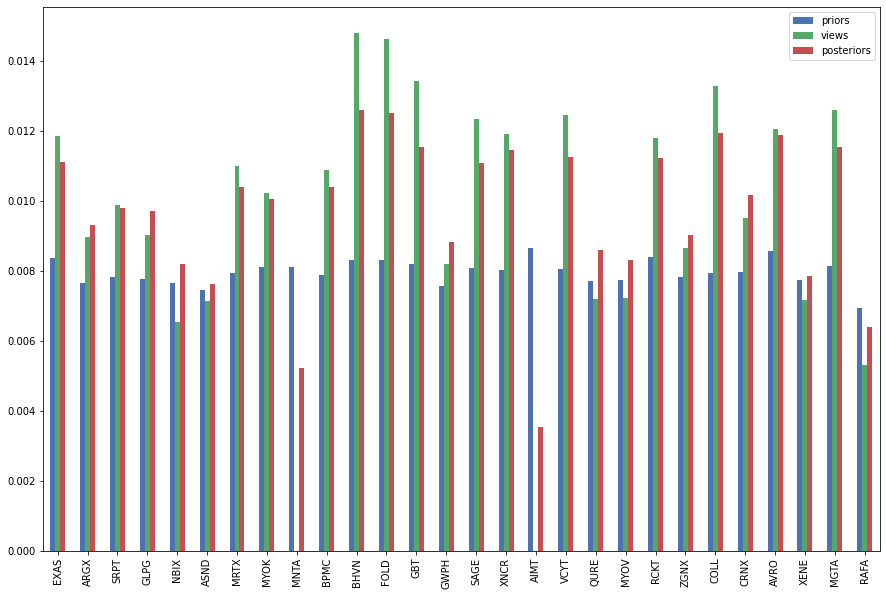

In [26]:
# visualising priors, views and posteriors
bl_df = pd.DataFrame([priors, pred_returns, post_ret]).T
bl_df.columns = ['priors', 'views', 'posteriors']
bl_df.plot(kind='bar', figsize=(15, 10))

## Optimise weights based on constraints

#### Using CAPM to obtain benchmark

In [27]:
# calculate benchmark return
IBB = get_data_for_multiple_stocks(['IBB'], dt.date(2020, 1, 1), dt.date(2020, 9, 30))
IBB_returns = get_df_by_metric(IBB, 'log_return')

GSPC = get_data_for_multiple_stocks(['^GSPC'], dt.date(2020, 1, 1), dt.date(2020, 9, 30))
GSPC_returns = get_df_by_metric(GSPC, 'log_return')

0/1
0/1


In [28]:
IBB_df = pd.DataFrame(IBB_returns)
GSPC_df = pd.DataFrame(GSPC_returns)

In [29]:
GSPC_df.columns = ['GSPC']

In [30]:
# Retrieving risk-free rates

# 2019
rf_2019 = pd.read_csv(join(data_path, 'yield_rate_2019.csv'))
rf_2019.drop(rf_2019.columns.difference(['Date','1 Yr']), 1, inplace=True)

rf_2019['1 Yr'] = rf_2019['1 Yr'].apply(lambda x: x / 100)
rf_2019['Date'] = pd.to_datetime(rf_2019['Date'])
rf_2019.set_index("Date", inplace=True)
rf_2019.rename(columns={'1 Yr': 'risk_free_rate'}, inplace=True)

# 2020
rf_2020 = pd.read_csv(join(data_path, 'yield_rate_2020.csv'))
rf_2020.drop(rf_2020.columns.difference(['Date','1 Yr']), 1, inplace=True)

rf_2020['1 Yr'] = rf_2020['1 Yr'].apply(lambda x: x / 100)
rf_2020['Date'] = pd.to_datetime(rf_2020['Date'])
rf_2020.set_index("Date", inplace=True)
rf_2020.rename(columns={'1 Yr': 'risk_free_rate'}, inplace=True)

# combine series and align index
rf = rf_2019.append(rf_2020)
rf = GSPC_returns.merge(rf, how='left', left_index=True, right_index=True)['risk_free_rate']
rf.fillna(method='ffill', inplace=True)

rf

Date
2020-01-02    0.0156
2020-01-03    0.0155
2020-01-06    0.0154
2020-01-07    0.0153
2020-01-08    0.0155
               ...  
2020-09-24    0.0012
2020-09-25    0.0012
2020-09-28    0.0012
2020-09-29    0.0012
2020-09-30    0.0012
Name: risk_free_rate, Length: 189, dtype: float64

In [31]:
import datetime
rf=rf[rf.index <= datetime.datetime(2020,9,30)]
rf=rf[rf.index >= datetime.datetime(2020,1,1)]

In [32]:
#2020 rf rate
rf = pd.DataFrame(rf)
rf['risk_free_rate'] = rf['risk_free_rate']/252 #Convert risk-free rate to daily
rf

,risk_free_rate
Date,
2020-01-02,0.000062
2020-01-03,0.000062
2020-01-06,0.000061
2020-01-07,0.000061
2020-01-08,0.000062
...,...
2020-09-24,0.000005
2020-09-25,0.000005
2020-09-28,0.000005


In [33]:
#Merge indices to risk-free rate to calculate excess 
index_with_rf = pd.concat([IBB_df['IBB'], GSPC_df['GSPC'],rf['risk_free_rate']], axis=1, ignore_index=False)
index_with_rf['IBB_excess'] =  index_with_rf['IBB'] - index_with_rf['risk_free_rate']
index_with_rf['GSPC_excess'] =  index_with_rf['GSPC'] - index_with_rf['risk_free_rate']
index_with_rf

,IBB,GSPC,risk_free_rate,IBB_excess,GSPC_excess
Date,,,,,
2020-01-02,-0.005158,0.008344,0.000062,-0.005220,0.008282
2020-01-03,-0.012844,-0.007085,0.000062,-0.012905,-0.007146
2020-01-06,0.006401,0.003527,0.000061,0.006339,0.003466
2020-01-07,0.000252,-0.002807,0.000061,0.000191,-0.002868
2020-01-08,0.008940,0.004890,0.000062,0.008879,0.004829
...,...,...,...,...,...
2020-09-24,-0.010580,0.002983,0.000005,-0.010584,0.002978
2020-09-25,0.021049,0.015850,0.000005,0.021044,0.015846
2020-09-28,0.007539,0.015982,0.000005,0.007534,0.015977


In [34]:
#Use OLS to obtain beta
y = index_with_rf['IBB_excess']
X = index_with_rf['GSPC_excess']

import statsmodels.api as sm
X1 = sm.add_constant(X)

#Create CAPM model
model = sm.OLS(y, X1)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             IBB_excess   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     459.1
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           3.11e-52
Time:                        21:33:48   Log-Likelihood:                 564.07
No. Observations:                 189   AIC:                            -1124.
Df Residuals:                     187   BIC:                            -1118.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0005      0.001      0.511      

In [35]:
#From XGBoost, r-f rate = 0.0008 and excess return = 0.010753. From OLS model, beta = 0.7821
benchmark_ret = 0.00008 + 0.7821 * 0.010753 #From `XGBoost Input`.ipynb
print(benchmark_ret)

0.008489921300000002


In [36]:
import cvxpy as cvx

# returns series

# convert to simple returns, since our 'views' are calculated as simple returns
returns = np.exp(log_returns_df.T.to_numpy()) - 1

# no. of weights to optimize 
m = returns.shape[0]

# cov matrix
cov = np.cov(returns)

x = cvx.Variable(m)

# get portfolio variance from covariance matrix and candidate weights
portfolio_variance = cvx.quad_form(x, cov)

# total returns for obj func
bl_approach = True
if bl_approach:
    exp_ret = post_ret  # using posterior returns from BL model
else:
    exp_ret = updated_returns  # using SML method

portfolio_total_return = sum(cvx.multiply(exp_ret, x))  # weighted avg of asset returns

#objective function
returns_scale = 0.001
objective = cvx.Minimize(portfolio_variance - returns_scale*portfolio_total_return)

# setting up constraint to limit amt invested by market cap
bin_1 = np.where(market_cap > 10, 1, 0)
bin_2 = np.where((market_cap > 2) & (market_cap <= 10), 1, 0)
bin_3 = np.where((market_cap <= 2), 1, 0)
A = np.asmatrix([bin_1, bin_2, bin_3])
bounds = np.asmatrix([0.1, 0.6, 0.3])
A_mod = A - bounds.T

VaR_max = 0.2
constraints = [x >= 0,
               sum(x) == 1, 
               x <= 0.2,
               A_mod@x.T <= 0,
               portfolio_total_return >= benchmark_ret,  # only accept returns greater than this
               portfolio_variance <= np.power(VaR_max / 1.66, 2)  # only tolerate portfolio variance less than this
              ] 

problem = cvx.Problem(objective, constraints)

result = problem.solve()

# optimised weights
weights = round(pd.Series(x.value, index=log_returns_df.columns), 3)
weights.sort_values(ascending=False)

ASND    0.200
NBIX    0.165
ARGX    0.111
XENE    0.107
GLPG    0.100
GWPH    0.079
MYOV    0.063
RAFA    0.060
QURE    0.044
XNCR    0.027
CRNX    0.022
COLL    0.016
VCYT    0.006
RCKT    0.000
MYOK    0.000
AVRO    0.000
SRPT    0.000
ZGNX    0.000
MRTX    0.000
BPMC    0.000
MNTA    0.000
BHVN    0.000
FOLD    0.000
GBT     0.000
MGTA    0.000
SAGE    0.000
AIMT    0.000
EXAS    0.000
dtype: float64

In [37]:
import pickle 
from pathlib import Path

opt_weights_path = Path(r'/Users/bryankoh/Documents/GitHub/RiskAnalytics/Midterm Report/data/optimised_weights_xgb_2020.pickle')
with open(opt_weights_path, 'wb') as handle:
    pickle.dump(weights, handle)

In [38]:
# check assigned weights by market cap
holdings.dropna(subset=['market cap ($B)'], inplace=True)
holdings['market_cap_classification'] = holdings['market cap ($B)'].apply(lambda x: 1 if float(x) <= 2
                                                                         else 2 if float(x) <= 10 else 3)


# check weights for market cap
weighted_mcap = holdings.merge(weights.rename("weights"), how='inner', left_on='ticker', right_index=True)
weighted_mcap.groupby(by=['market_cap_classification']).sum()['weights']

market_cap_classification
1    0.301
2    0.599
3    0.100
Name: weights, dtype: float64

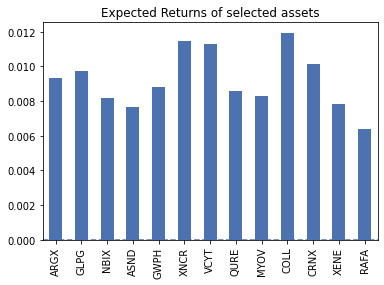

In [39]:
selected = weights[weights > 0].index
exp_ret[selected].plot(kind='bar', title='Expected Returns of selected assets')
plt.axhline(0, linestyle='--')

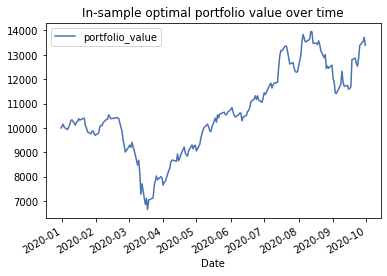

In [40]:
# portfolio value over time
initial_investment = 10000
num_shares = np.divide(weights * initial_investment, adj_close_df.iloc[0])
opt_pf_df = pd.DataFrame(index=adj_close_df.index)
opt_pf_df['portfolio_value'] = np.dot(num_shares, adj_close_df.T)
opt_pf_df.plot(title='In-sample optimal portfolio value over time')

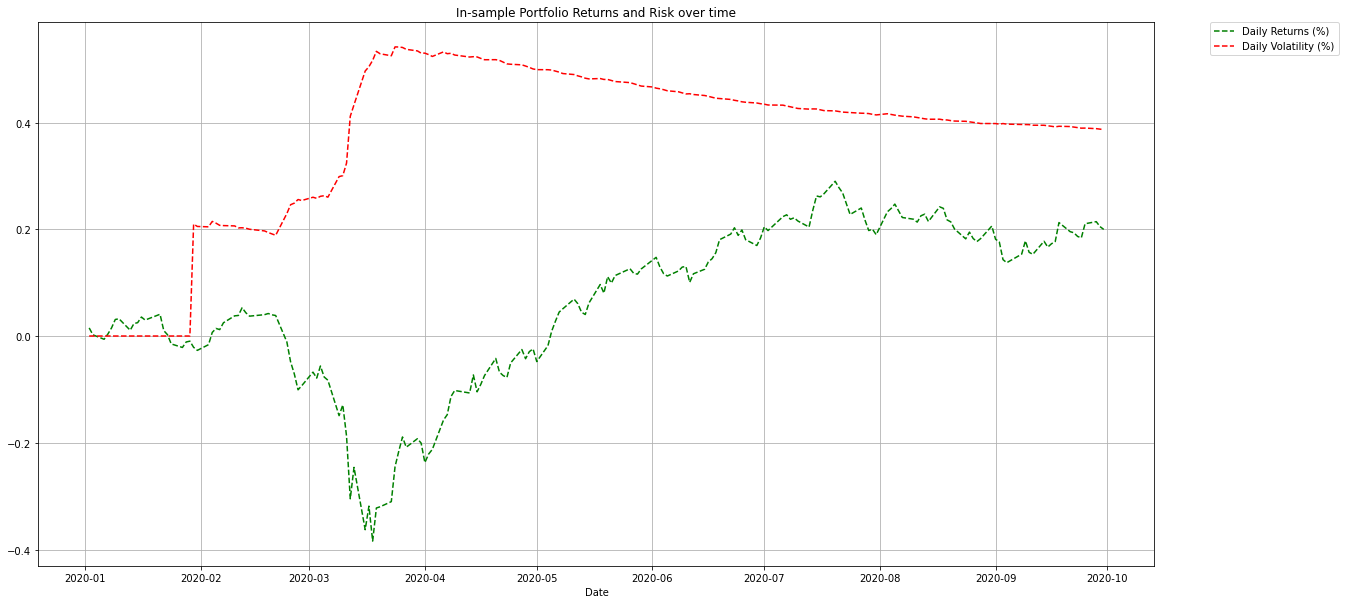

In [41]:
# portfolio return and volatility
pf_returns = np.dot((np.exp(log_returns_df) - 1), weights)
pf_log_returns = pd.Series(np.log(1 + pf_returns))
pf_volatility = pd.Series(pf_log_returns).expanding(20).apply(lambda x: np.sqrt(260) * np.std(x)).fillna(0)

plt.figure(figsize=(20, 10))
plt.plot(log_returns_df.index, pf_log_returns.expanding(0).apply(lambda x: sum(x)), 'g--', label='Daily Returns (%)')
plt.plot(log_returns_df.index, pf_volatility, 'r--', label='Daily Volatility (%)')
plt.grid(True)
plt.xlabel('Date')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('In-sample Portfolio Returns and Risk over time')

plt.show()

In [42]:
# 1-2. portfolio returns based on adjusted returns, using ETIHX fund weights

assert all(fund_weights.index == exp_ret.index)
returns = np.dot(fund_weights, exp_ret)
variance = np.dot(fund_weights, np.dot(fund_weights, cov))

print(f'ETIHX portfolio returns: {returns}')
print(f'ETIHX portfolio risk: {variance}')

ETIHX portfolio returns: 0.009661051652773842
ETIHX portfolio risk: 0.0008881901684732213


In [43]:
# 1-2. portfolio returns based on adjusted returns, using optimised weights

assert all(weights.index == exp_ret.index)
returns = np.dot(weights, exp_ret)
variance = np.dot(weights, np.dot(weights, cov))

print(f'Optimal portfolio returns: {returns}')
print(f'Optimal portfolio risk: {variance}')

Optimal portfolio returns: 0.008492235695097104
Optimal portfolio risk: 0.0005640656317511608


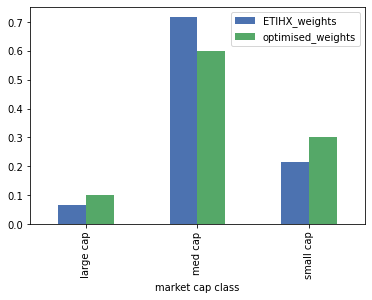

In [44]:
# 3. compare allocation by market cap weights
weights.name = 'optimised_weights'
best = holdings[['ticker', 'market cap ($B)']]
compare = best.merge(weights, how='left', left_on='ticker', right_index=True)
compare = compare.merge(fund_weights.rename("ETIHX_weights"), how='left', left_on='ticker', right_index=True)

# grp by market cap
compare['market cap class'] = compare['market cap ($B)'].apply(lambda x: 'small cap' if float(x) <= 2
                                                               else 'med cap' if float(x) <= 10 else 'large cap')

compare.groupby(by='market cap class').sum()[['ETIHX_weights', 'optimised_weights']].plot(kind='bar')

# Getting risk and returns

In [45]:
# Get index data
index_data = get_data_for_multiple_stocks(['^NBI'], dt.date(2020, 1, 1), dt.date(2020, 9, 30))
index_log_returns_df = get_df_by_metric(index_data, 'log_return')
index_weights = pd.Series([1], index=['^NBI'])

0/1


In [46]:
def get_returns_risk_sharpe(returns_data, weights, rf_rate,
                            plot_returns=False, portfolio_name=""):
    '''
    returns_data is a pd.DataFrame containing the log returns for the various assets in the portfolio
    weights is a pd.Series containing the percentage of each holding
    plot_returns: set to True to show plot of portfolio value over time
    rf_rate: the annualised risk free rate for the period of the returns
    
    this function calculates the annualised returns (in excess of risk free rate), \
        risk and sharpe ratio
    '''
    
    if not all(returns_data.columns == weights.index):
        print ('please align the indexes for weights and returns data')
        return
    
    n_days = returns_data.shape[0]
    
    # portfolio return
    returns = np.dot(weights, np.exp(returns_data.T.values) - 1)  # portfolio simple returns
    print(returns)
    
    compounded_returns = np.cumprod(1 + returns)
    final_return = compounded_returns[-1]

    
    return_daily = np.exp(np.log(final_return) / n_days) - 1
    return_yearly = (1 + return_daily) ** 252 - 1
    return_yearly -= rf_rate
    
    # portfolio variance
    sd = np.std(returns)
    annualised_sd = np.sqrt(252) * sd
        
    sharpe_ratio = return_yearly / annualised_sd
    
    if plot_returns:
        plt.figure(figsize=(20, 10))
        plt.plot(returns_data.index, compounded_returns, 'r--', label='returns')
        plt.axhline(y=1, color='black', linestyle='--')
        plt.grid(True)
        plt.ylabel(f'Portfolio Value')
        plt.xlabel('Date')
        plt.title(f"{portfolio_name} Portfolio Value over Time")
        plt.show()

    return return_yearly, annualised_sd, sharpe_ratio

In [48]:
import pickle
from pathlib import Path

optimised_weights_path = Path(r"/Users/bryankoh/Documents/GitHub/RiskAnalytics/Midterm Report/data/optimised_weights_xgb_2020.pickle")
with open(optimised_weights_path, 'rb') as handle:
    optimised_weights = pickle.load(handle)

optimised_weights.sort_values(ascending=False)

ASND    0.200
NBIX    0.165
ARGX    0.111
XENE    0.107
GLPG    0.100
GWPH    0.079
MYOV    0.063
RAFA    0.060
QURE    0.044
XNCR    0.027
CRNX    0.022
COLL    0.016
VCYT    0.006
RCKT    0.000
MYOK    0.000
AVRO    0.000
SRPT    0.000
ZGNX    0.000
MRTX    0.000
BPMC    0.000
MNTA    0.000
BHVN    0.000
FOLD    0.000
GBT     0.000
MGTA    0.000
SAGE    0.000
AIMT    0.000
EXAS    0.000
dtype: float64

[ 0.01530779 -0.01285369 -0.00831779  0.00970739  0.01176084  0.01586643
  0.00124888 -0.02120497  0.01259479  0.00168288  0.01060871 -0.0056385
  0.01089339 -0.03013375 -0.00769021 -0.01709847 -0.00658208  0.01028484
  0.00157906 -0.01150016 -0.00568831  0.01074785  0.02324614  0.00741208
 -0.0021648   0.01292017  0.01304508  0.00066339  0.01466624 -0.00939559
 -0.00634401  0.002741    0.00220423 -0.00243685 -0.00128538 -0.0483609
 -0.03649813 -0.02254722 -0.02917136  0.00773834  0.02565316 -0.01103221
  0.02284055 -0.02034808 -0.00605342 -0.06418526  0.02032313 -0.05699471
 -0.11056747  0.06055054 -0.11016508  0.04509134 -0.06336181  0.06396003
  0.00231291  0.0096517   0.06753556  0.029435    0.02712966 -0.01897141
  0.01604968 -0.00821479 -0.03587205  0.01607393  0.00883777  0.05659262
  0.01009846  0.03452324  0.01139588 -0.00467486  0.03436416 -0.03108855
  0.01418284  0.01659417  0.03244942 -0.02534389 -0.00640621 -0.00345058
  0.02763547  0.02536197 -0.01706105  0.01328345  0.0

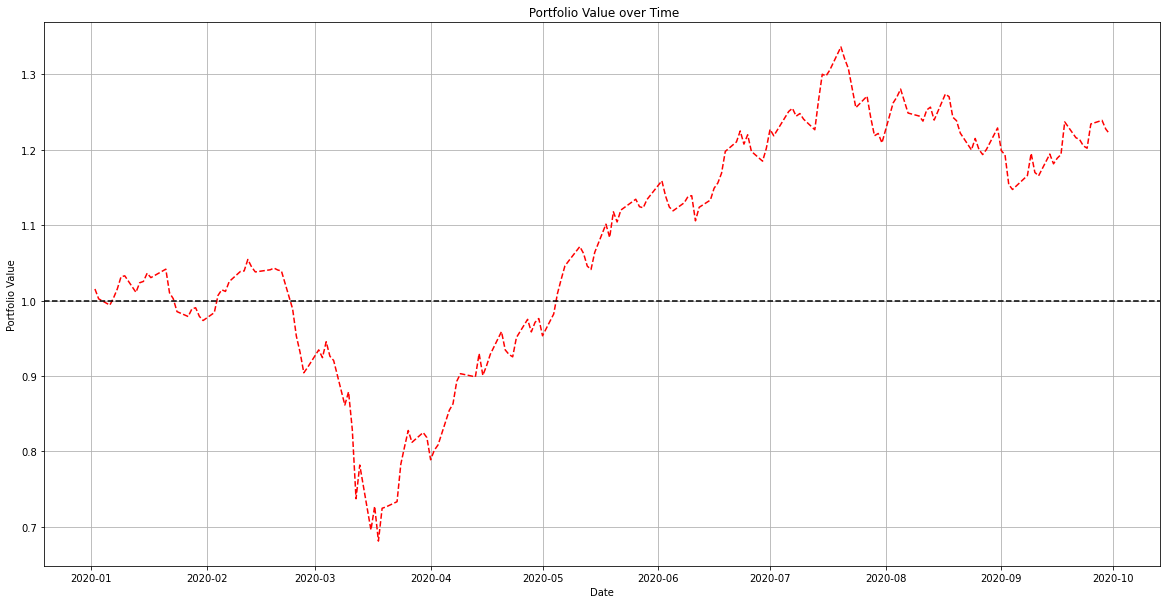

(0.2985205733983955, 0.3760218766139691, 0.7938915046287643)

In [49]:
optimal_portfolio_stats = get_returns_risk_sharpe(log_returns_df, optimised_weights, rf_rate, True)
optimal_portfolio_stats

Optimal portfolio -- Annualised return: 0.299, Annualised s.d: 0.376, Sharpe Ratio: 0.794

## Make predictions for October 2020

In [50]:
start = dt.date(2020, 10 ,1)
end = dt.date(2020, 10, 31)

ETIHX_oos = get_data_for_multiple_stocks(tickers, start, end)

0/31
5/31
10/31
15/31
something went wrong with BOLD
20/31
25/31
something went wrong with STML
30/31


In [51]:
ETIHX_oos.pop("KRTX")

,Ticker,High,Low,Open,Close,Volume,Adj Close,Prev Close,daily_return,log_return
Date,,,,,,,,,,
2020-09-30,KRTX,79.478996,76.389999,79.160004,77.320000,355900,77.320000,NaN,NaN,NaN
2020-10-01,KRTX,80.900002,77.663002,78.250000,79.930000,267700,79.930000,77.320000,0.033756,0.033199
2020-10-02,KRTX,80.415001,75.660004,78.459999,75.870003,167900,75.870003,79.930000,-0.050794,-0.052130
2020-10-05,KRTX,81.980003,76.665001,76.760002,81.370003,156300,81.370003,75.870003,0.072492,0.069985
2020-10-06,KRTX,82.300003,79.400002,81.239998,80.209999,144600,80.209999,81.370003,-0.014256,-0.014359
2020-10-07,KRTX,80.209999,74.129997,77.900002,79.419998,295900,79.419998,80.209999,-0.009849,-0.009898
2020-10-08,KRTX,79.709999,77.625000,79.540001,77.839996,141300,77.839996,79.419998,-0.019894,-0.020095
2020-10-09,KRTX,80.449997,77.779999,78.250000,79.720001,142700,79.720001,77.839996,0.024152,0.023865
2020-10-12,KRTX,80.410004,78.445000,78.669998,79.160004,91100,79.160004,79.720001,-0.007025,-0.007049


In [52]:
index_oos = get_data_for_multiple_stocks(['^NBI'], start, end)

0/1


In [53]:
# risk free rate for October 2020
yield_df = pd.read_csv(r"/Users/bryankoh/Documents/GitHub/RiskAnalytics/Midterm Report/data/yield_rate_2020.csv")
yield_df.drop(yield_df.columns.difference(['Date','1 Yr']), 1, inplace=True)

yield_df['1 Yr'] = yield_df['1 Yr'].apply(lambda x: x / 100)
yield_df['Date'] = pd.to_datetime(yield_df['Date'])
yield_df.set_index("Date", inplace=True)
yield_df.rename(columns={'1 Yr': 'risk_free_rate'}, inplace=True)
yield_df.head()

,risk_free_rate
Date,
2020-01-02,0.0156
2020-01-03,0.0155
2020-01-06,0.0154
2020-01-07,0.0153
2020-01-08,0.0155


In [54]:
yield_df = yield_df[yield_df.index > end_sep]

In [55]:
rf_rate_oct = yield_df['risk_free_rate'].mean()
rf_rate_oct

0.0012666666666666664

[ 0.00268295 -0.00659282  0.03325736 -0.00386039  0.01883302 -0.0085676
  0.00474751 -0.01072325 -0.00360195 -0.01832188 -0.01091617  0.00223685
 -0.0069654  -0.00524112 -0.02324917  0.00773643  0.02466904 -0.0173195
  0.00516236 -0.02948556  0.00265535 -0.00262216]


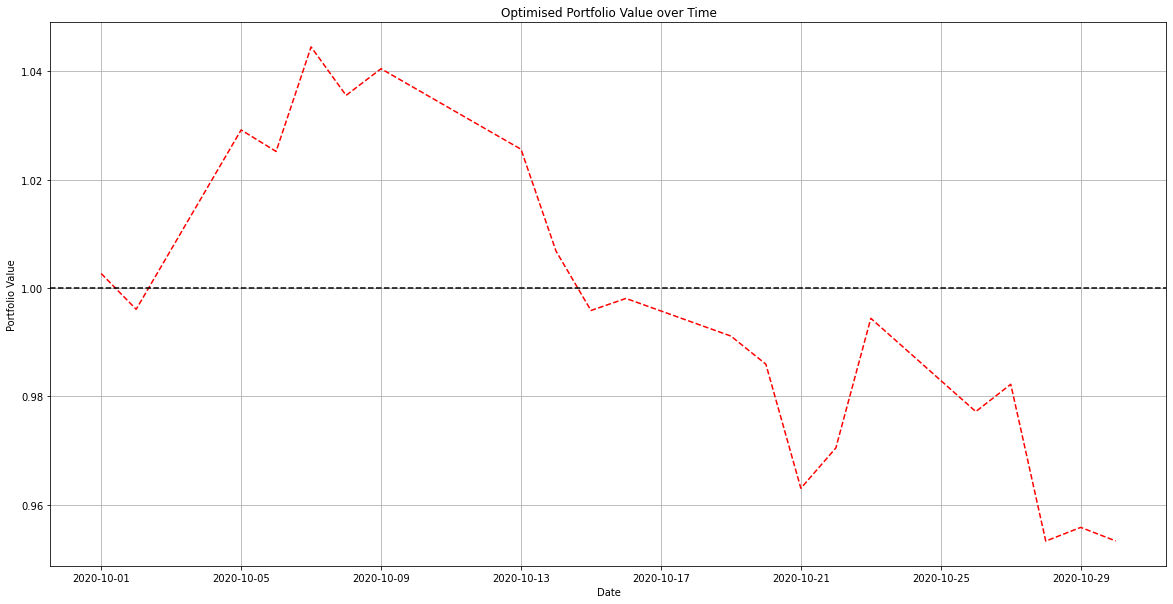

[ 0.00940863 -0.02189067  0.04394026 -0.01174946  0.02202782  0.00262003
  0.00796077  0.00728394  0.00487926 -0.01275986 -0.02327076  0.00494625
 -0.01806437 -0.00583771 -0.01598845  0.01340663  0.00261217 -0.00920396
  0.00518384 -0.02533817  0.00617783 -0.0213475 ]


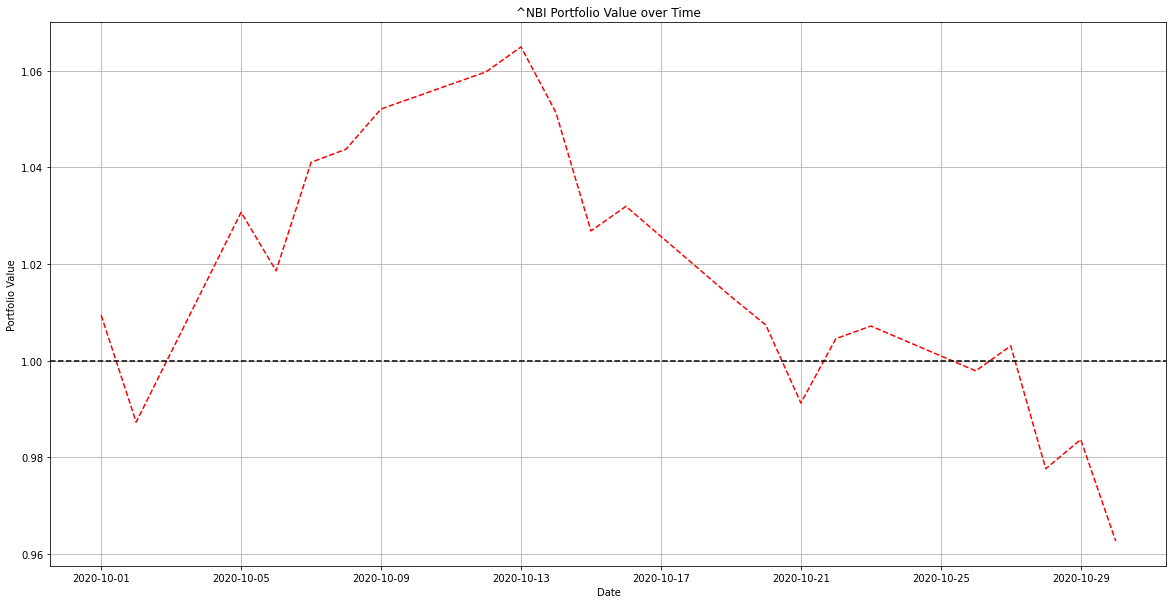

In [56]:
ETIHX_oos_returns = get_df_by_metric(ETIHX_oos, 'log_return')
ETIHX_oos_returns = ETIHX_oos_returns.fillna(0)
index_oos_returns = get_df_by_metric(index_oos, 'log_return')


# get oos stats
optimised_oos_stats = get_returns_risk_sharpe(ETIHX_oos_returns, optimised_weights, rf_rate_oct, True, 'Optimised')
index_oos_stats = get_returns_risk_sharpe(index_oos_returns, index_weights, rf_rate_oct, True, '^NBI')

In [57]:
# compile results
out_of_sample = pd.DataFrame([index_oos_stats, optimised_oos_stats],
                            columns=['return', 'std_dev', 'sharpe_ratio'],
                            index=['Index', 'optimal'])
out_of_sample

,return,std_dev,sharpe_ratio
Index,-0.354301,0.261985,-1.352370
optimal,-0.423137,0.229816,-1.841194
